<a href="https://colab.research.google.com/github/mohdraavi/LSTM/blob/main/NLP_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is is NLP?

##Natural Language:

In neuropsychology, linguistics, and philosophy of language, a natural language or ordinary language is any language that occurs naturally in a human community by a process of use, repetition, and change without conscious planning or premeditation. It can take different forms, namely either a spoken language or a sign language. Natural languages are distinguished from constructed and formal languages such as those used to program computers or to study logic.

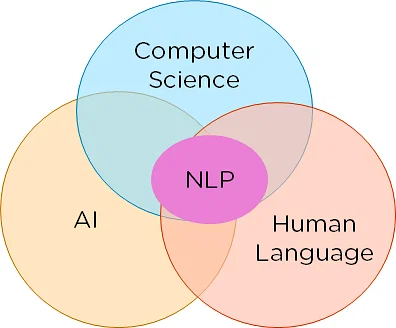

 Natural language processing (NLP) is “a subfield of human language, computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

#Need of NLP

One of the essential things in the life of a human being is communication. We need to communicate with other human beings to deliver information, express our emotions, present ideas, and much more. The key to communication is language. We need a common language to communicate, which both ends of the conversation can understand. Doing this is possible for humans, but it might seem a bit difficult if we talk about communicating with a computer system or the computer system communicating with us.


But we have a solution for that, Artificial Intelligence, or more specifically, a branch of Artificial Intelligence known as Natural Language Processing (NLP). Natural Language Processing enables the computer system to understand and comprehend information the same way humans do. It helps the computer system understand the literal meaning and recognize the sentiments, tone, opinions, thoughts, and other components that construct a proper conversation.

#Real world applications

1. Contextual Advertisements
2. Email Clients- spam filtering, smart reply
3. Monitoring Social media like removing opinion mining,removing adult content
4. Search Engines
5. Chatbots
6. Text/Documnent Classification
7. Sentiment Analysis
8. Information Retrieval by using NER
10. Part Of Speech
11. Language Detection and Machine Translation
12. Grammer Checkers
13. Document Analysis
14. Topic Modeling
15. Text Generation

#Approaches to NLP:



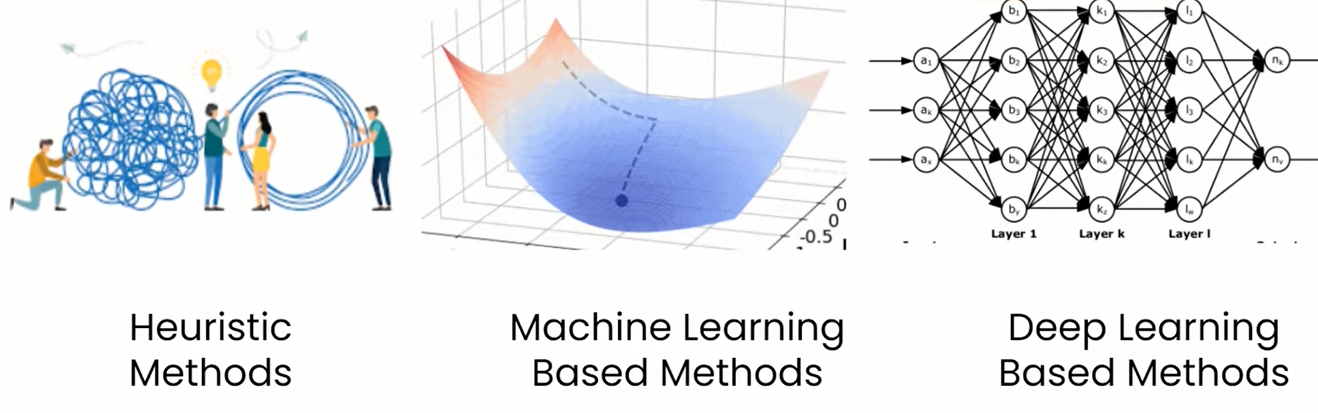

#1. Heuristic Methods:

Examples:

Regular Expression

Wordnet

open mind common sense

#2. Machine Learning Approach:



Algorithms:

Naive bayes

Logistic Regression

SVM

LDA

Hidden Markow Models

ML does not care about the sequence of the text.

#2. Deep Learning Approach:

##Architechture used:

###RNN
###LSTM/GRU
###CNN
###Transformers
###Autoencoders





#Challengees in NLP:

##1. Ambiguity
I saw the boy on the beach with my binoculars.

I have never tasted a cake quite like that one before.

##2. Contextual Words

i ran to the store because we ran out of milk.

##3. Colloquialisms and slang

piece of cake , pulling your leg.



##4. Creativity
poems, dialogue, scripts

#NLP Pipeline:
NLP Pipeline is a set of steps followed to build an end to end NLP software.

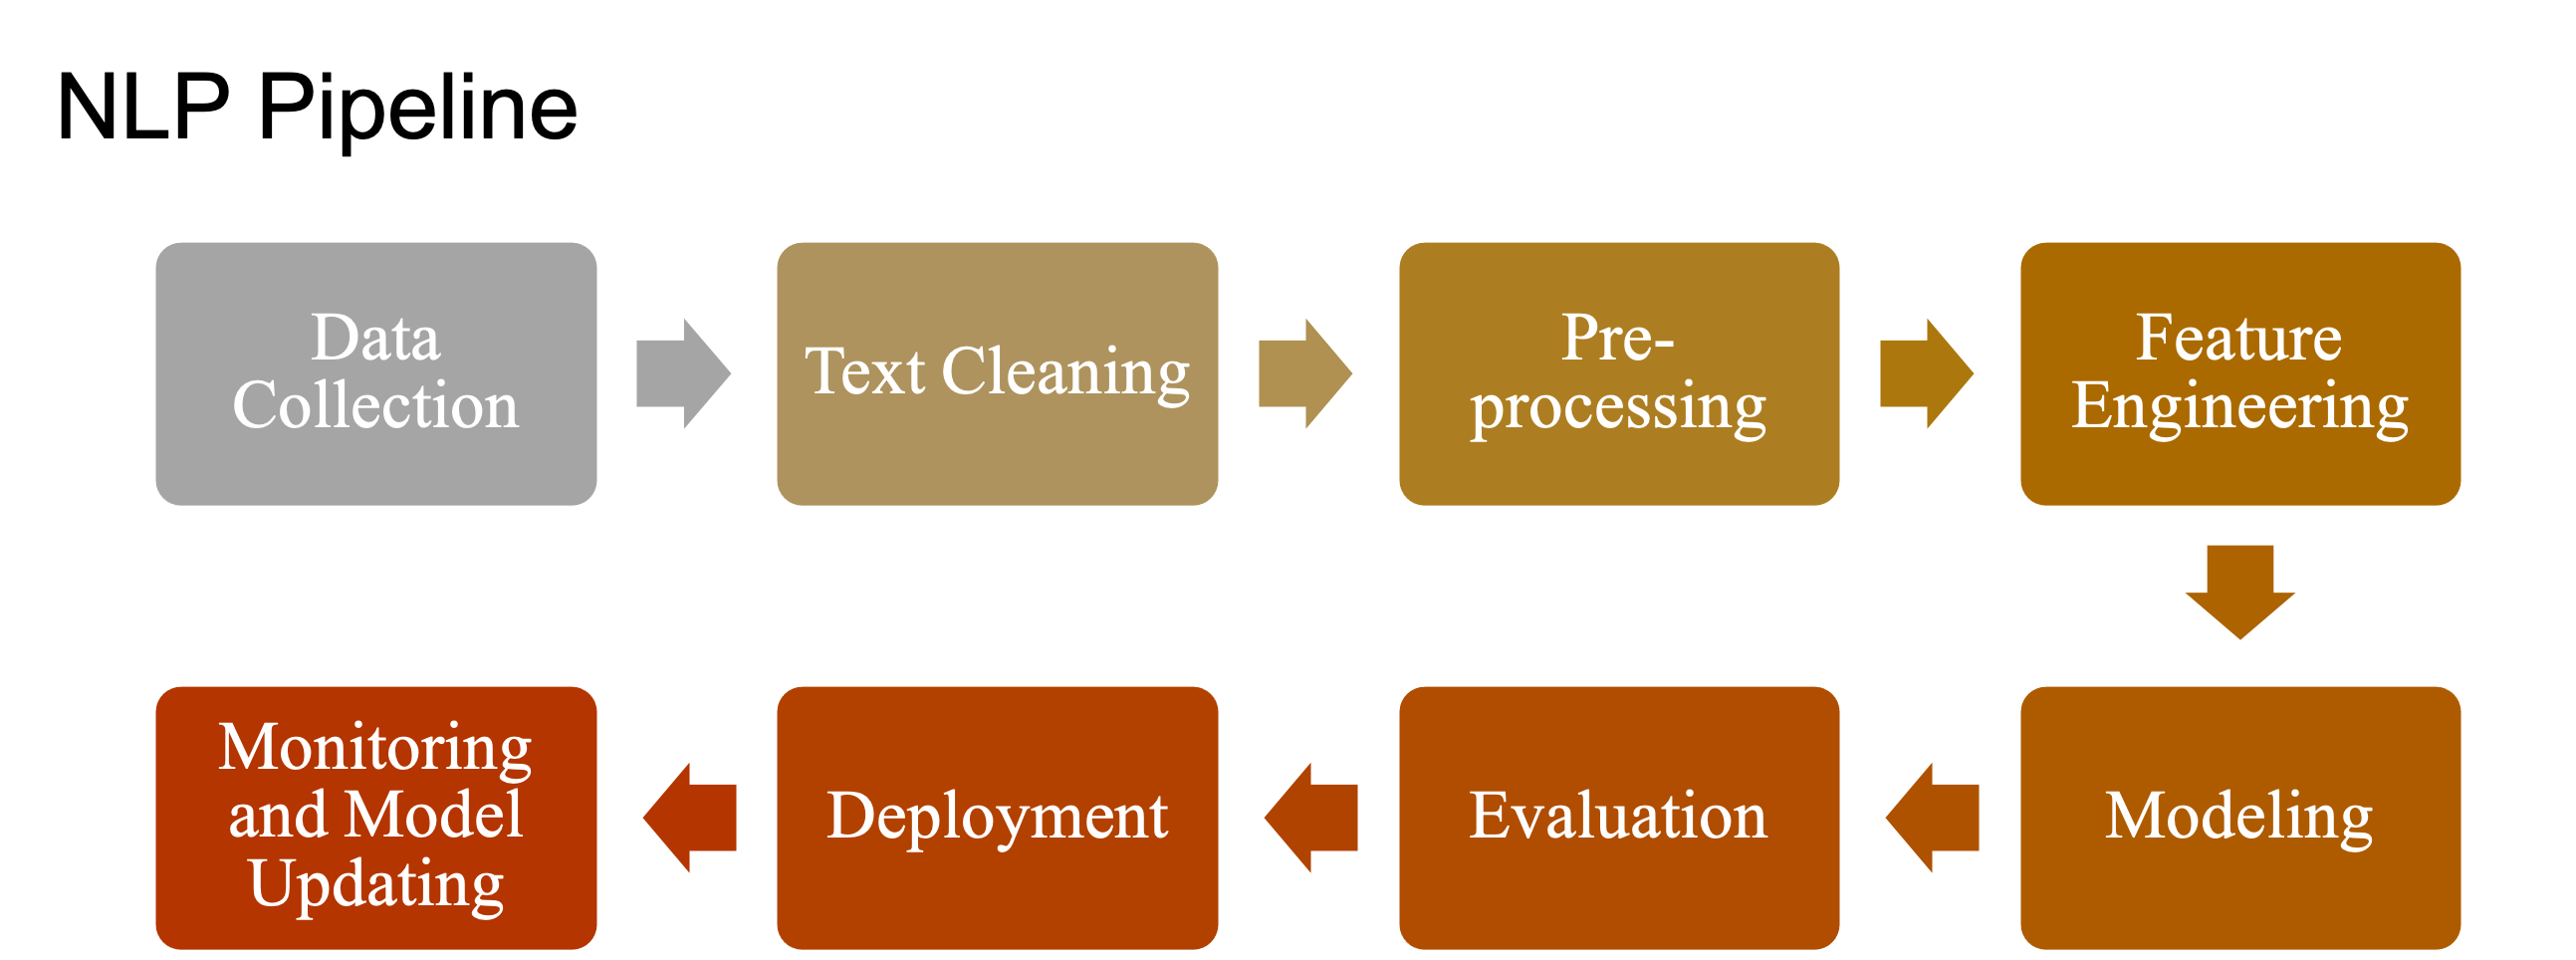

#Preprocessing

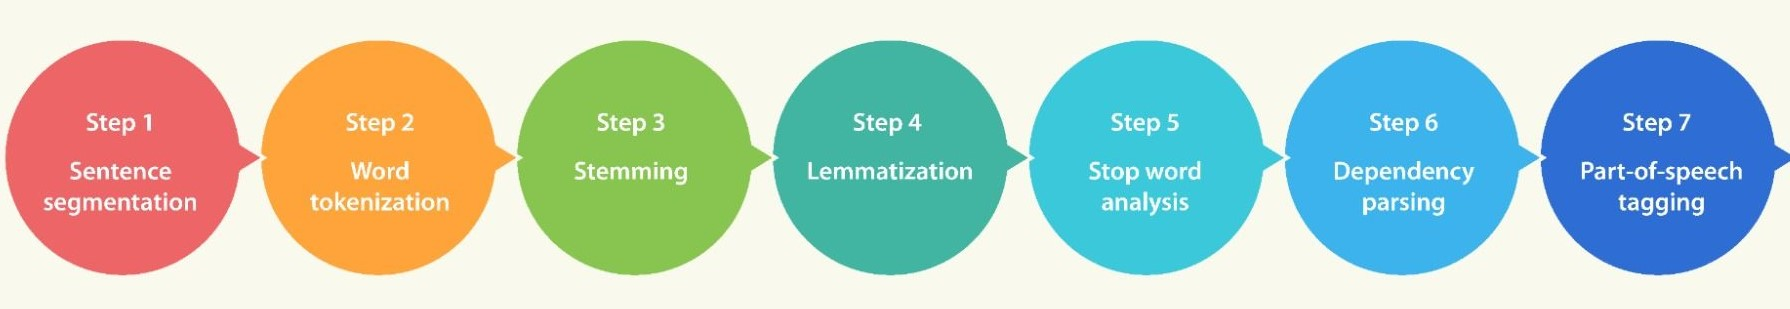

## Sentence Segmentation:

You first need to break the entire document down into its constituent sentences. You can do this by segmenting the article along with its punctuations like full stops and commas.

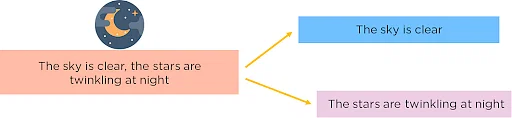

##Tokenizing:

For the algorithm to understand these sentences, you need to get the words in a sentence and explain them individually to our algorithm. So, you break down your sentence into its constituent words and store them. This is called tokenizing, and each world is called a token.

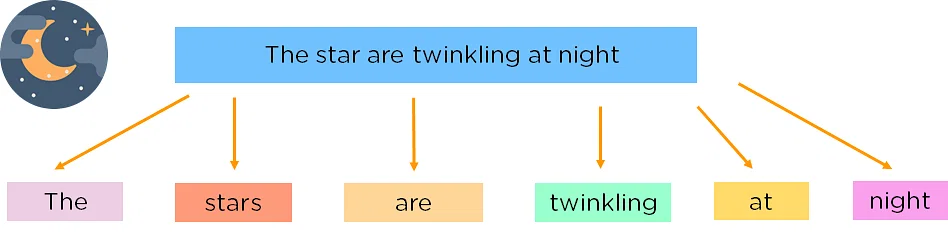

##Removing Stop Words:

You can make the learning process faster by getting rid of non-essential words, which add little meaning to our statement and are just there to make our statement sound more cohesive. Words such as was, in, is, and, the, are called stop words and can be removed.

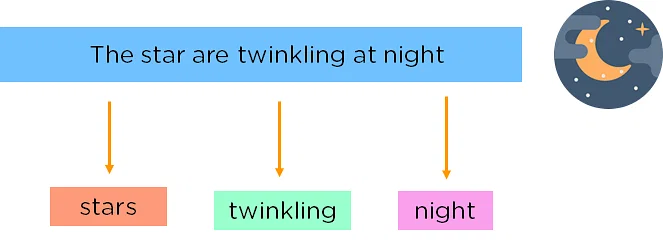

##Stemming:
it is the process of obtaining the Word Stem of a word. Word Stem gives new words upon adding affixes to them

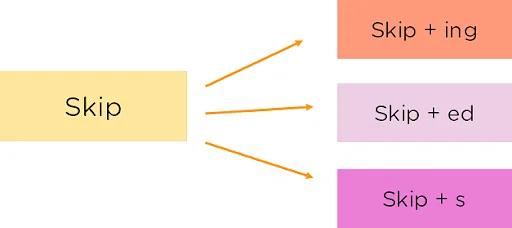

##Lemmatization:

The process of obtaining the Root Stem of a word. Root Stem gives the new base form of a word that is present in the dictionary and from which the word is derived. You can also identify the base words for different words based on the tense, mood, gender,etc

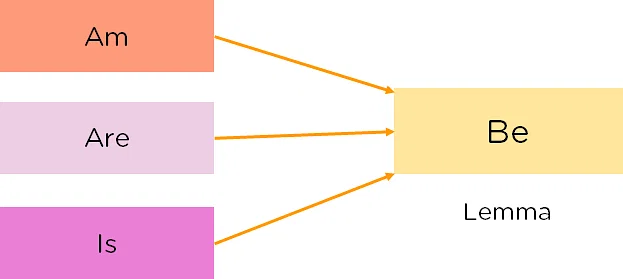

##Part of Speech Tagging:

Now, you must explain the concept of nouns, verbs, articles, and other parts of speech to the machine by adding these tags to our words. This is called ‘part of’.



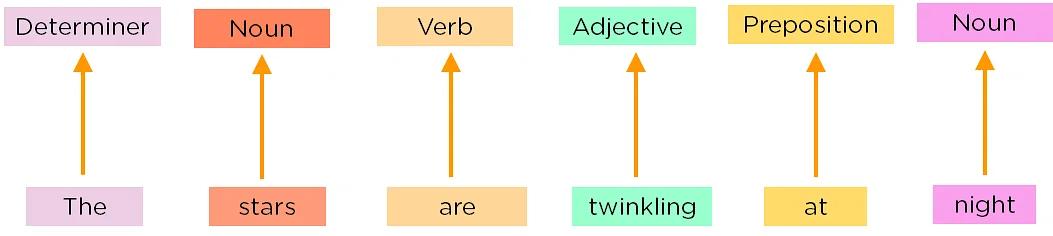

##Named Entity Tagging:

Next, introduce your machine to pop culture references and everyday names by flagging names of movies, important personalities or locations, etc that may occur in the document. You do this by classifying the words into subcategories. This helps you find any keywords in a sentence. The subcategories are person, location, monetary value, quantity, organization, movie.


#Vectorization


Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models. It's a crucial step in natural language processing (NLP) and text analysis. Different text vectorization techniques capture various aspects of the textual information. Here are some common text vectorization techniques:

###1.Bag of Words (BoW):

###2.Term Frequency-Inverse Document Frequency (TF-IDF)

###3.Word Embeddings (Word2Vec, GloVe, FastText)

#Sentiment Analysis

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from datetime import *
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')

# Import stemming and lemmatizing libraries from NLTK
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

# Import vectorization libraries from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Import evaluation metrics from scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression


import string
import nltk
from nltk.corpus import stopwords

In [11]:
import sys

##Data Collection

In [12]:
m_cols = ['index','date','Query','tweets']

In [13]:
df = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',encoding='latin-1',names=m_cols )

In [14]:
df.head()

index      date            Query  \
0 1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                         tweets  
0 1467810369  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
  1467810672  is upset that he can't update his Facebook by ...  
  1467810917  @Kenichan I dived many times for the ball. Man...  
  1467811184    my whole body feels itchy and like its on fire   
  1467811193  @nationwideclass no, it's not behaving at all....

##Dataset Rows & Columns count

In [15]:
# Dataset Rows & Columns count
print(f'Number of Rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of Rows : 1600000
Number of columns : 4


In [16]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1600000 entries, (0, 1467810369) to (4, 2193602129)
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   index   1600000 non-null  object
 1   date    1600000 non-null  object
 2   Query   1600000 non-null  object
 3   tweets  1600000 non-null  object
dtypes: object(4)
memory usage: 100.9+ MB


In [17]:
new_df = df[['tweets']]

In [18]:
# Dataset Duplicate Value Count
new_df.duplicated().sum()

18534

In [19]:
new_df.drop_duplicates(inplace=True)

In [20]:
# Dataset Duplicate Value Count
new_df.duplicated().sum()

0

In [21]:
# Missing Values/Null Values Count
new_df.isnull().sum()

tweets    0
dtype: int64

#Text Cleaning

###1.Removing Users Name

In [22]:
def remove_name(text):
  return " ".join([i for i in text.split() if '@' not in i])

In [23]:
new_df['cleaned_tweets'] = new_df['tweets'].apply(remove_name)

###2. Expand Contraction

In [24]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.0 MB/s eta 0:00:00


In [25]:
#Expand Contraction
import contractions
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(lambda x : contractions.fix(x))

###3.Removing Punctuations

In [26]:
# Remove Punctuations
def remove_punc(data):
  translator = str.maketrans('', '', string.punctuation)
  return data.translate(translator)

In [27]:
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(remove_punc)

###4. Removing URLs & Removing words and digits contain digits.

In [28]:
# Remove URLs & Remove words and digits contain digits
import re
#remove urls
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(lambda x :re.sub(r'http\S+',"",x))
#removing digits
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(lambda x : re.sub(r"\d+","",x))

###5. Lower Casing

In [29]:
# Lower Casing
def lower(text):
  return " ".join([i.lower() for i in text.split()])

In [30]:
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(lower)

###6.Removing white Spaces

In [31]:

# Remove White spaces
def space_rem(text):
    text = [word.strip() for word in text.split()]
    return " ".join(text)

In [32]:
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(space_rem)

###7. Removing Accents from Words

In [33]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.1 MB/s eta 0:00:00


In [34]:
# Import the unidecode module
import unidecode

In [35]:
#function for remove accents from words
def remove_accents(text):
  return " ".join([unidecode.unidecode(i) for i in text.split()])

In [36]:
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(remove_accents)

###8. Remove Hashtag

In [37]:
#function for remove hashtags
def remove_hash(text):
  l=[]
  for i in text.split():
    if '#' not in i:
      l.append(i)
    else:
      l.append(i.replace("#", ""))
  return ' '.join(l)

In [38]:
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(remove_hash)

#Preprocessing

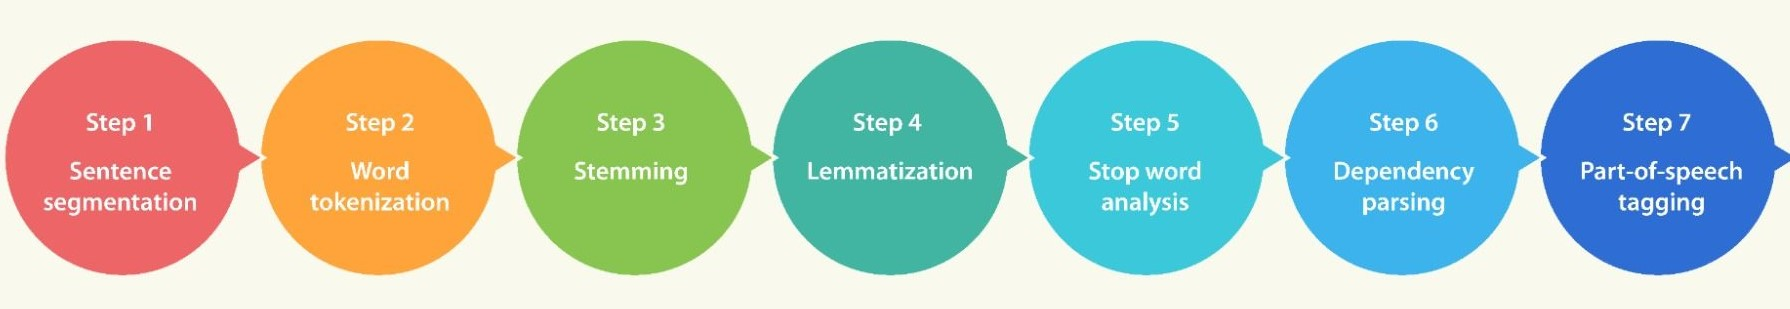

###Word Tokenization

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
# Tokenization
new_df['cleaned_tweets'] = new_df['tweets'].apply(nltk.word_tokenize)

###2. Text Normalization

In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [42]:

# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = " ".join([lemmatizer.lemmatize(token) for token in tokens])
    return lemmatized_tokens

# Lemmatize the 'Review' column
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(lemmatize_tokens)


###3.Removing Stopwords

In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the input text into words
    words = word_tokenize(text)

    # Get the English stopwords from nltk
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)

    return filtered_text

# Example usage:
# Assuming new_df and 'cleaned_tweets' column are defined elsewhere in your code
new_df['cleaned_tweets'] = new_df['cleaned_tweets'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###4. Part of speech tagging

In [44]:
# POS Taging
#nltk.download('averaged_perceptron_tagger')
#def pos(text):
#  text=nltk.pos_tag(text)
#  return text

In [45]:
#new_df['cleaned_tweets'] = new_df['tweets'].apply(pos)

In [46]:
new_df.reset_index(inplace=True)

In [47]:
new_df.drop(columns=['level_0','level_1'],inplace=True)

#Loading Model

In [48]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification,pipeline
# Instantiate Huggingface models
model_name = 'finiteautomata/beto-sentiment-analysis'
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True, num_labels=3)
#from_pt=True, because this model only exists in PyTorch
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Combining tokenizer and model into one classifier
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/481k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [49]:
# Create labels in an unsupervised manner with the beto-sentiment-analysis classifier:
## Creating lists for a new dataframe that contains the assigned label and the corresponding probability score
sentiment_output = []
sentiment_proba = []
## Looping through the scraped tweets and adding the predictions to the previously created lists
for tweet in new_df['cleaned_tweets'][1000:2000]: #select first 10 tweets only
  result = classifier(tweet) #save analyzer result
  sentiment_output.append(result[0]['label']) #select given label
  sentiment_proba.append(result[0]['score']) #select probability of given label
# Concat results with selected columns from original dataframe
sentiment_beto_df = pd.concat([new_df[1000:2000][['cleaned_tweets']], pd.Series(sentiment_output), pd.Series(sentiment_proba)], axis=1)
# Rename new columns to 'sentiment' and 'sentiment_probability'
sentiment_beto_df.rename(columns={0: 'sentiment_output', 1: 'sentiment_probability'}, inplace=True)
print('-- This df still contains the tweets that have low probability scores! --')
display(sentiment_beto_df)

-- This df still contains the tweets that have low probability scores! --


,cleaned_tweets,sentiment_output,sentiment_probability
1000,"@ JonathanRKnight @ silver_tulip27 Um , would ...",NaN,NaN
1001,'m homework . 's gosh darn hard ! !,NaN,NaN
1002,definitely vacation ... http : //plurk.com/p/m...,NaN,NaN
1003,'study group extraordinare ' leave campus ... ...,NaN,NaN
1004,"ca n't airfare go ? , live Texas ! ! n't know ...",NaN,NaN
...,...,...,...
995,NaN,NEU,0.997301
996,NaN,NEU,0.993896
997,NaN,NEU,0.998384
998,NaN,NEU,0.721581


In [50]:
# Removing tweets that have low probability scores
df_high_prob = sentiment_beto_df[sentiment_beto_df['sentiment_probability']>0.9].reset_index(drop=True )
print('-- The following df only contains tweets that have high probability scores with p>0.9. --')
display(df_high_prob)

-- The following df only contains tweets that have high probability scores with p>0.9. --


,cleaned_tweets,sentiment_output,sentiment_probability
0,NaN,NEU,0.996990
1,NaN,POS,0.988597
2,NaN,NEU,0.994589
3,NaN,NEU,0.997266
4,NaN,NEG,0.945766
...,...,...,...
839,NaN,NEU,0.996242
840,NaN,NEU,0.998388
841,NaN,NEU,0.997301
842,NaN,NEU,0.993896


In [52]:
df_high_prob['sentiment_output'].value_counts()

NEU    734
POS     63
NEG     47
Name: sentiment_output, dtype: int64

In [59]:
sentiment_counts = df_high_prob['sentiment_output'].value_counts()

# Convert the result to a list
counts_list = sentiment_counts.tolist()

In [60]:
counts_list

[734, 63, 47]

In [54]:
sentiment_labels = df_high_prob['sentiment_output'].unique()

In [58]:
list(sentiment_labels)

['NEU', 'POS', 'NEG']

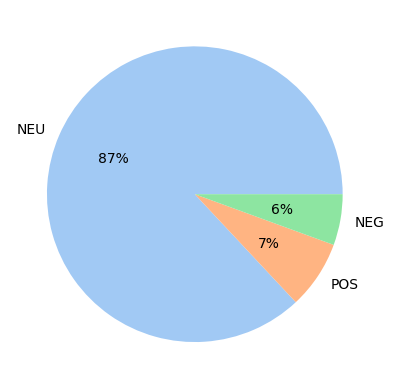

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = counts_list
labels = list(sentiment_labels)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [65]:

# Class count
class_count_neut, class_count_pos,class_count_neg =df_high_prob['sentiment_output'].value_counts()

# Separate class
class_neu = df_high_prob[df_high_prob['sentiment_output'] == 'NEU']
class_pos = df_high_prob[df_high_prob['sentiment_output'] == 'POS']
class_neg = df_high_prob[df_high_prob['sentiment_output'] == 'NEG']


Random Under-Sampling

In [66]:

class_neu_under = class_neu.sample(class_count_pos)
test_under = pd.concat([class_neu_under, class_pos,class_neg], axis=0)


In [73]:
test_under['sentiment_output'].value_counts()

NEU    63
POS    63
NEG    47
Name: sentiment_output, dtype: int64